In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headway = pd.read_csv('../data/Headway Data.csv')

In [3]:
weather_all = pd.read_csv('../data/bna_weather.csv')

### info for all csv files

In [4]:
headway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [5]:
weather_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       9739 non-null   object 
 1   key                        9739 non-null   object 
 2   class                      9739 non-null   object 
 3   expire_time_gmt            9739 non-null   int64  
 4   obs_id                     9739 non-null   object 
 5   obs_name                   9739 non-null   object 
 6   valid_time_gmt             9739 non-null   int64  
 7   day_ind                    9739 non-null   object 
 8   temp                       9739 non-null   int64  
 9   wx_icon                    9739 non-null   int64  
 10  icon_extd                  9739 non-null   int64  
 11  wx_phrase                  9739 non-null   object 
 12  pressure_tend              2885 non-null   float64
 13  pressure_desc              2885 non-null   objec

### n/a counts

In [6]:
headway.isna().sum()

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              41
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           54383
ACTUAL_DEPARTURE_TIME         54430
ADHERENCE                     54430
SCHEDULED_HDWY               432294
ACTUAL_HDWY                  473824
HDWY_DEV                     474368
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED    402647
IS_RELIEF                   

In [7]:
weather_all.isna().sum()

Date                            0
key                             0
class                           0
expire_time_gmt                 0
obs_id                          0
obs_name                        0
valid_time_gmt                  0
day_ind                         0
temp                            0
wx_icon                         0
icon_extd                       0
wx_phrase                       0
pressure_tend                6854
pressure_desc                6854
dewPt                           0
heat_index                      0
rh                              0
pressure                        0
vis                             4
wc                              8
wdir                         1522
wdir_cardinal                   8
gust                         8279
wspd                            8
max_temp                     9378
min_temp                     9378
precip_total                 9636
precip_hrly                     0
snow_hrly                    9730
uv_desc       

### narrowing weather data down to date and temperature

In [8]:
weather_df = weather_all[['Date', 'temp', 'wx_phrase']]
weather_df

,Date,temp,wx_phrase
0,2021-11-01 00:53:00,51,Cloudy
1,2021-11-01 01:30:00,50,Partly Cloudy
2,2021-11-01 01:53:00,49,Fair
3,2021-11-01 02:53:00,48,Fair
4,2021-11-01 03:53:00,47,Fair
...,...,...,...
9734,2022-10-31 19:53:00,60,Cloudy
9735,2022-10-31 20:53:00,60,Cloudy
9736,2022-10-31 21:53:00,58,Mostly Cloudy
9737,2022-10-31 22:53:00,60,Mostly Cloudy


In [9]:
headway['HDWY_DEV'].describe()

count    1.507347e+06
mean     3.647395e-01
std      6.579797e+00
min     -2.220667e+02
25%     -1.883334e+00
50%      0.000000e+00
75%      1.966666e+00
max      1.054617e+03
Name: HDWY_DEV, dtype: float64

### Dropped all columns to right of HDWY_DEV 

In [10]:
headway_df = headway.drop(headway.iloc[:, 22:30], inplace=True, axis=1)

In [11]:
headway_df = headway.rename(columns={"DATE":"Date"})

In [12]:
headway.ROUTE_ABBR.unique()

array([ 7, 50, 22, 23,  3, 52, 55, 56])

In [13]:
weather_all['Date'] = weather_all['Date'].str[:10]
weather_all

,Date,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2021-11-01,KBNA,observation,1635753180,KBNA,Nashville,1635745980,N,51,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-01,KBNA,observation,1635755400,KBNA,Nashville,1635748200,N,50,29,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-01,KBNA,observation,1635756780,KBNA,Nashville,1635749580,N,49,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-01,KBNA,observation,1635760380,KBNA,Nashville,1635753180,N,48,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-01,KBNA,observation,1635763980,KBNA,Nashville,1635756780,N,47,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9734,2022-10-31,KBNA,observation,1667271180,KBNA,Nashville,1667263980,N,60,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9735,2022-10-31,KBNA,observation,1667274780,KBNA,Nashville,1667267580,N,60,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9736,2022-10-31,KBNA,observation,1667278380,KBNA,Nashville,1667271180,N,58,27,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9737,2022-10-31,KBNA,observation,1667281980,KBNA,Nashville,1667274780,N,60,27,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
weather_all[['Date', 'temp', 'wx_phrase']]

,Date,temp,wx_phrase
0,2021-11-01,51,Cloudy
1,2021-11-01,50,Partly Cloudy
2,2021-11-01,49,Fair
3,2021-11-01,48,Fair
4,2021-11-01,47,Fair
...,...,...,...
9734,2022-10-31,60,Cloudy
9735,2022-10-31,60,Cloudy
9736,2022-10-31,58,Mostly Cloudy
9737,2022-10-31,60,Mostly Cloudy


In [15]:
wego_trips = headway_df.merge(weather_df, on=['Date'], how='outer')
wego_trips

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,Date,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,temp,wx_phrase
0,120211101.0,1.0,76447164.0,2021-11-01,7.0,1704.0,2088.0,297750.0,0.0,TO DOWNTOWN,...,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,NaN,NaN
1,120211101.0,1.0,76447165.0,2021-11-01,7.0,1704.0,2088.0,297750.0,0.0,TO DOWNTOWN,...,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,NaN,NaN
2,120211101.0,1.0,76447166.0,2021-11-01,7.0,1704.0,2088.0,297750.0,0.0,TO DOWNTOWN,...,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,NaN
3,120211101.0,1.0,76447167.0,2021-11-01,50.0,1704.0,2088.0,297749.0,0.0,TO DOWNTOWN,...,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,NaN
4,120211101.0,1.0,76447168.0,2021-11-01,50.0,1704.0,2088.0,297749.0,0.0,TO DOWNTOWN,...,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991449,NaN,NaN,NaN,2022-10-31 19:53:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Cloudy
1991450,NaN,NaN,NaN,2022-10-31 20:53:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Cloudy
1991451,NaN,NaN,NaN,2022-10-31 21:53:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,Mostly Cloudy
1991452,NaN,NaN,NaN,2022-10-31 22:53:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Mostly Cloudy


In [16]:
print(wego_trips['wx_phrase'].unique())

[nan 'Cloudy' 'Partly Cloudy' 'Fair' 'Mostly Cloudy' 'Light Rain' 'Mist'
 'Haze' 'Fog' 'Patches of Fog' 'Rain' 'Heavy Rain' 'Cloudy / Windy'
 'Light Drizzle' 'Drizzle' 'Thunder in the Vicinity' 'Thunder'
 'Mostly Cloudy / Windy' 'T-Storm / Windy' 'Heavy T-Storm' 'T-Storm'
 'Thunder / Windy' 'Light Rain with Thunder' 'Partly Cloudy / Windy'
 'Heavy Rain / Windy' 'Wintry Mix' 'Light Snow and Sleet' 'Light Snow'
 'Snow' 'Fair / Windy' 'Heavy Snow' 'Light Sleet' 'Snow and Sleet'
 'Light Rain / Windy' 'Rain / Windy' 'Heavy T-Storm / Windy'
 'Light Drizzle / Windy' 'Smoke']


In [17]:
avg_headway_weather = wego_trips.groupby('wx_phrase', as_index=False)['HDWY_DEV'].mean()

In [18]:
avg_headway_weather

,wx_phrase,HDWY_DEV
0,Cloudy,NaN
1,Cloudy / Windy,NaN
2,Drizzle,NaN
3,Fair,NaN
4,Fair / Windy,NaN
5,Fog,NaN
6,Haze,NaN
7,Heavy Rain,NaN
8,Heavy Rain / Windy,NaN
9,Heavy Snow,NaN


### Focusing on 1 and 4 in the read me

#### 1. How much impact does being late or too spaced out at the first stop have downstream?

#### 4. What is the relationship between distance or time travelled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has travelled?

In [19]:
headway_df.head(60)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,Date,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,1,36.178360,-86.845441,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,0,36.193454,-86.839981,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN
7,120211101,1,76447971,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,0,36.182177,-86.814445,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN
8,120211101,1,76447972,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,2,36.167091,-86.781923,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN
9,120211101,1,76447973,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,...,1,36.167091,-86.781923,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN


In [20]:
hdwy_distance = headway_df[['TRIP_ID', 'HDWY_DEV']]
hdwy_distance

,TRIP_ID,HDWY_DEV
0,297750,1.983333
1,297750,3.333333
2,297750,NaN
3,297749,NaN
4,297749,NaN
...,...,...
1981710,329980,NaN
1981711,330003,-2.366667
1981712,330003,NaN
1981713,330011,NaN


In [21]:
hdwy_distance.head(60)

,TRIP_ID,HDWY_DEV
0,297750,1.983333
1,297750,3.333333
2,297750,NaN
3,297749,NaN
4,297749,NaN
5,298143,NaN
6,298143,NaN
7,298143,NaN
8,298143,NaN
9,298162,NaN


In [22]:
clean_hdwy_distance = hdwy_distance.dropna()

In [23]:
clean_hdwy_distance

,TRIP_ID,HDWY_DEV
0,297750,1.983333
1,297750,3.333333
12,298128,-0.366667
13,298128,0.866666
14,298128,-1.016667
...,...,...
1981695,329461,-1.150000
1981696,329461,-2.500000
1981698,329459,-1.883334
1981699,329459,-6.516667


In [24]:
clean_hdwy_distance.head(60)

,TRIP_ID,HDWY_DEV
0,297750,1.983333
1,297750,3.333333
12,298128,-0.366667
13,298128,0.866666
14,298128,-1.016667
16,298151,1.116666
17,298151,0.400000
19,298129,0.233333
20,298129,5.416666
21,298129,10.066666


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
test = clean_hdwy_distance.head(100)

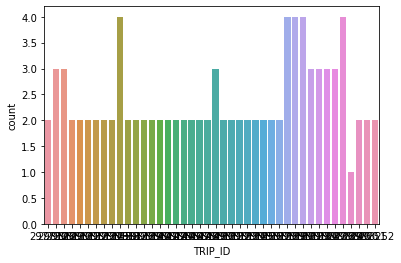

In [27]:
sns.countplot(x="TRIP_ID", data = test)
plt.show()

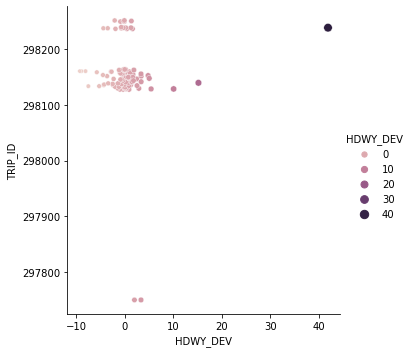

In [39]:
sns.relplot(x = "HDWY_DEV",
            y = "TRIP_ID",
            data = test,
            kind = "scatter", 
            size = "HDWY_DEV", 
            hue = "HDWY_DEV")